# Topic modelling using Scikit learn 

In [3]:
import pandas as pd
import numpy as numpy
import os
from gensim.models.wrappers import LdaMallet
from gensim.models.wrappers.ldamallet import malletmodel2ldamodel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

import pickle

In [68]:
train_data=pd.read_pickle("train_first_data.pkl")
train_data

,ID,Review,Rating
0,0,exceptional service nice daughter priced king ...,5
1,1,beautiful relaxing jw marriott desert ridge ou...,5
2,2,location location min subway take blommingdale...,5
3,3,pleased nice safe flower market vast array res...,3
4,4,excellent service excellent location couple mi...,4
...,...,...,...
14338,14338,madrid perfect location tiny quiet street cent...,5
14339,14339,excellent florence chosen tripadviser hidden g...,5
14340,14340,place relax vacation book trip paradisus husba...,4
14341,14341,week seattle loved minute pacific plaza buy im...,3


# For topic modelling using all text

Vectorization of the text data with TF-IDF

we can use other vectorization technique such as Bag of Words, Word2Vec, 

In [5]:
tfidf = TfidfVectorizer(max_features=10000)

In [25]:
X=tfidf.fit_transform(train_data["Review"])

In [8]:
#here i am taking five topics
lda = LatentDirichletAllocation(n_components=5,random_state=1)

In [9]:
lda.fit(X)

LatentDirichletAllocation(n_components=5, random_state=1)

In [10]:
tfidf.get_feature_names()[109]

'additionally'

In [11]:
singletopic = lda.components_[0]

In [12]:
topic1 = singletopic.argsort()[-20:]

In [13]:
for j in topic1:
    print(tfidf.get_feature_names()[j])

desk
friendly
restaurant
hotel
street
price
area
view
floor
bathroom
place
clean
small
service
breakfast
bed
nice
staff
room
location


In [14]:
print("number of topics:", len(lda.components_))
print("number of columns of lda fit:", len(lda.components_[0]) )

number of topics: 5
number of columns of lda fit: 10000


In [20]:
feature=tfidf.get_feature_names()

In [21]:
for ind ,topic in enumerate(lda.components_):
    print("top 50 words in topics{}".format(ind))
    print('-'*25)
    top_50=topic.argsort()[-50:]
    print([feature[i] for i in top_50], '\n\n')
    

top 50 words in topics0
-------------------------
['thing', 'experience', 'car', 'suite', 'rate', 'window', 'recommend', 'problem', 'morning', 'lobby', 'internet', 'star', 'parking', 'large', 'bar', 'bit', 'review', 'noise', 'door', 'booked', 'minute', 'shower', 'check', 'walk', 'night', 'free', 'excellent', 'city', 'helpful', 'comfortable', 'desk', 'friendly', 'restaurant', 'hotel', 'street', 'price', 'area', 'view', 'floor', 'bathroom', 'place', 'clean', 'small', 'service', 'breakfast', 'bed', 'nice', 'staff', 'room', 'location'] 


top 50 words in topics1
-------------------------
['spanish', 'lot', 'tip', 'couple', 'chair', 'eat', 'island', 'area', 'friendly', 'activity', 'towel', 'entertainment', 'family', 'husband', 'dinner', 'loved', 'amazing', 'hour', 'year', 'clean', 'club', 'day', 'review', 'ground', 'bad', 'wonderful', 'problem', 'room', 'thing', 'ocean', 'fun', 'make', 'kid', 'week', 'trip', 'buffet', 'bar', 'staff', 'place', 'drink', 'nice', 'water', 'service', 'vacation',

# Topic modeling Noun only

In [22]:
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

In [23]:
# Apply the nouns function to the Text  to filter only on nouns
train_data["noun"]=train_data["Review"].apply(nouns)

In [24]:
train_data.head()

,ID,Review,Rating,noun
0,0,exceptional service nice daughter priced king ...,5,service daughter weekend night service reserva...
1,1,beautiful relaxing jw marriott desert ridge ou...,5,jw marriott desert ridge accommodation busines...
2,2,location location min subway take blommingdale...,5,location location blommingdales min walk macy ...
3,3,pleased nice safe flower market vast array res...,3,flower market array restaurant gay district di...
4,4,excellent service excellent location couple mi...,4,service location couple minute walk duomo davi...


In [26]:
tfidf = TfidfVectorizer(max_features=10000)

In [28]:
X=tfidf.fit_transform(train_data["noun"])

In [30]:
lda_noun = LatentDirichletAllocation(n_components=5,random_state=5)

In [31]:
lda_noun.fit(X)

LatentDirichletAllocation(n_components=5, random_state=5)

In [32]:
feature=tfidf.get_feature_names()

In [33]:
for ind ,topic in enumerate(lda_noun.components_):
    print("top 50 words in topics{}".format(ind))
    print('-'*25)
    top_50=topic.argsort()[-50:]
    print([feature[i] for i in top_50], '\n\n')

top 50 words in topics0
-------------------------
['work', 'door', 'airport', 'reservation', 'bit', 'night', 'fun', 'club', 'money', 'drink', 'dinner', 'bed', 'car', 'star', 'husband', 'family', 'morning', 'hotel', 'buffet', 'lobby', 'bathroom', 'check', 'price', 'year', 'floor', 'experience', 'day', 'breakfast', 'review', 'location', 'week', 'hour', 'view', 'desk', 'vacation', 'trip', 'problem', 'thing', 'area', 'bar', 'water', 'restaurant', 'people', 'room', 'place', 'staff', 'service', 'pool', 'food', 'beach'] 


top 50 words in topics1
-------------------------
['gordon', 'reservation', 'za', 'deca', 'davanzati', 'bargellino', 'arno', 'atlantico', 'exceptional', 'croce', 'pillowcase', 'kindness', 'recommand', 'siena', 'value', 'gladstone', 'sabina', 'faenza', 'charlesmark', 'buckingham', 'duret', 'bassano', 'fabrizio', 'porta', 'perseo', 'michelangiolo', 'colomba', 'angela', 'rosanna', 'globus', 'albion', 'hospitality', 'drury', 'andra', 'cartwright', 'miriam', 'foch', 'hommes', 'm

# Topic modeling Noun and Adjuctive

In [34]:
def noun_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2]=='JJ'
    tokenized = word_tokenize(text)
    all_nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(all_nouns_adj)

In [36]:
# Apply the nouns function to the Text  to filter only on nouns
train_data["noun_adj"]=train_data["Review"].apply(noun_adj)

In [37]:
train_data.head()

,ID,Review,Rating,noun,noun_adj
0,0,exceptional service nice daughter priced king ...,5,service daughter weekend night service reserva...,exceptional service nice daughter suite weeken...
1,1,beautiful relaxing jw marriott desert ridge ou...,5,jw marriott desert ridge accommodation busines...,beautiful jw marriott desert ridge outstanding...
2,2,location location min subway take blommingdale...,5,location location blommingdales min walk macy ...,location location take blommingdales perfect m...
3,3,pleased nice safe flower market vast array res...,3,flower market array restaurant gay district di...,pleased nice safe flower market vast array res...
4,4,excellent service excellent location couple mi...,4,service location couple minute walk duomo davi...,excellent service excellent location couple mi...


In [38]:
tfidf = TfidfVectorizer(max_features=10000)
X=tfidf.fit_transform(train_data["noun_adj"])

In [39]:
lda_noun_adj = LatentDirichletAllocation(n_components=5,random_state=5)

In [40]:
lda_noun_adj.fit(X)

LatentDirichletAllocation(n_components=5, random_state=5)

In [41]:
feature=tfidf.get_feature_names()

In [42]:
for ind ,topic in enumerate(lda_noun_adj.components_):
    print("top 50 words in topics{}".format(ind))
    print('-'*25)
    top_50=topic.argsort()[-50:]
    print([feature[i] for i in top_50], '\n\n')

top 50 words in topics0
-------------------------
['couple', 'work', 'excellent', 'small', 'reservation', 'minute', 'lobby', 'ocean', 'ground', 'dinner', 'family', 'view', 'check', 'kid', 'husband', 'towel', 'star', 'experience', 'drink', 'club', 'fun', 'guest', 'year', 'wonderful', 'day', 'review', 'hour', 'buffet', 'area', 'desk', 'clean', 'bad', 'week', 'problem', 'thing', 'trip', 'vacation', 'bar', 'room', 'water', 'beautiful', 'restaurant', 'place', 'staff', 'nice', 'people', 'service', 'pool', 'food', 'beach'] 


top 50 words in topics1
-------------------------
['seine', 'bassano', 'pine', 'walt', 'moulin', 'preciados', 'verry', 'andrea', 'draycott', 'rouge', 'albion', 'colon', 'varenne', 'relais', 'brighton', 'omni', 'rer', 'excelent', 'residence', 'parisian', 'metro', 'marais', 'aubusson', 'duquesne', 'montecarlo', 'lombard', 'duret', 'magda', 'charles', 'le', 'france', 'hen', 'foch', 'cow', 'stag', 'cler', 'columbus', 'hollow', 'adagio', 'elysees', 'chelsea', 'motor', 'muse',

In [56]:
tfidf = TfidfVectorizer(max_features=10000,ngram_range=(2,2))

In [57]:
X=tfidf.fit_transform(train_data["Review"])

In [62]:
lda_bigram = LatentDirichletAllocation(n_components=5,random_state=5)

In [63]:
lda_bigram.fit(X)

LatentDirichletAllocation(n_components=5, random_state=5)

In [64]:
feature=tfidf.get_feature_names()

In [65]:
for ind ,topic in enumerate(lda_bigram.components_):
    print("top 50 words in topics{}".format(ind))
    print('-'*25)
    top_50=topic.argsort()[-50:]
    print([feature[i] for i in top_50], '\n\n')

top 50 words in topics0
-------------------------
['bathroom clean', 'reception staff', 'bit small', 'centrally located', 'double bed', 'perfect location', 'size bed', 'metro station', 'clean staff', 'easy walk', 'nice touch', 'helpful staff', 'central location', 'min walk', 'location excellent', 'location close', 'screen tv', 'comfortable bed', 'trip advisor', 'air conditioning', 'bathroom small', 'french quarter', 'flat screen', 'breakfast buffet', 'eiffel tower', 'breakfast included', 'excellent location', 'location perfect', 'staff extremely', 'desk staff', 'room clean', 'continental breakfast', 'short walk', 'free internet', 'internet access', 'cable car', 'highly recommend', 'friendly staff', 'helpful friendly', 'bed comfortable', 'clean comfortable', 'time square', 'train station', 'union square', 'room small', 'minute walk', 'walking distance', 'friendly helpful', 'staff helpful', 'staff friendly'] 


top 50 words in topics1
-------------------------
['nice breakfast', 'darling

# Trigram model

In [51]:
tfidf = TfidfVectorizer(max_features=10000,ngram_range=(3,3))
X=tfidf.fit_transform(train_data["Review"])

In [52]:
lda_trigram = LatentDirichletAllocation(n_components=5,random_state=5)

In [53]:
lda_trigram.fit(X)

LatentDirichletAllocation(n_components=5, random_state=5)

In [54]:
feature=tfidf.get_feature_names()

In [55]:
for ind ,topic in enumerate(lda_bigram.components_):
    print("top 50 words in topics{}".format(ind))
    print('-'*25)
    top_50=topic.argsort()[-50:]
    print([feature[i] for i in top_50], '\n\n')

top 50 words in topics0
-------------------------
['bathroom large tub', 'reception staff spoke', 'big double bed', 'celebrate wedding anniversary', 'desk staff spoke', 'pay rack rate', 'size bed twin', 'marriott reward point', 'clean friendly location', 'dr melia caribe', 'nice city view', 'helpful courteous breakfast', 'cd dvd player', 'metro easy cheap', 'located staff friendly', 'located main street', 'safe iron board', 'cleaning lady clean', 'train bus station', 'air conditioning enjoy', 'bathroom small adequate', 'french toast pancake', 'floor facing courtyard', 'bottled water pop', 'drinking water provided', 'breakfast buffet expensive', 'entertainment staff friendly', 'location close central', 'staff efficient friendly', 'daily continental breakfast', 'room flat screen', 'comfortable bathroom lovely', 'short walk train', 'free wifi room', 'incredibly comfortable bed', 'business district weekend', 'helpful room nice', 'friendly helpful direction', 'heard construction noise', 'be

In [ ]:
# 0-> Hotel facility
#1-> food, bar,hotel restaurant
# 2 -> Bad service
# 3-> beach and food
#4 -> staff

# documents belonging to the topics

In [66]:
len(lda_bigram.components_[1])

10000

In [67]:
# transform 
df_final = lda_bigram.transform(X)

print('Shape of the df_final:', df_final.shape)

Shape of the df_final: (14343, 5)


In [70]:
#assigning topics to dataframe
train_data['topic'] = df_final.argmax(axis = 1)

train_data.head()

,ID,Review,Rating,topic
0,0,exceptional service nice daughter priced king ...,5,1
1,1,beautiful relaxing jw marriott desert ridge ou...,5,3
2,2,location location min subway take blommingdale...,5,0
3,3,pleased nice safe flower market vast array res...,3,0
4,4,excellent service excellent location couple mi...,4,1


# Mapping topics with label

In [77]:
topic_label = {0:'Hotel Facility', 1:'food, bar,hotel restaurant', 2:'Bad service', 3:'beach and food', 4:'staff' }

# mapping the dictionary with the dataframe to get the labels.
train_data['topic_name'] = train_data['topic'].map(topic_label)
train_data.head()


,ID,Review,Rating,topic,topic_name
0,0,exceptional service nice daughter priced king ...,5,1,"food, bar,hotel restaurant"
1,1,beautiful relaxing jw marriott desert ridge ou...,5,3,beach and food
2,2,location location min subway take blommingdale...,5,0,Hotel Facility
3,3,pleased nice safe flower market vast array res...,3,0,Hotel Facility
4,4,excellent service excellent location couple mi...,4,1,"food, bar,hotel restaurant"


In [82]:
train_data.groupby(['Rating'])['topic_name'].value_counts()

Rating  topic_name                
1       beach and food                 346
        Bad service                    174
        Hotel Facility                 163
        staff                          156
        food, bar,hotel restaurant     138
2       beach and food                 440
        Hotel Facility                 265
        food, bar,hotel restaurant     258
        staff                          169
        Bad service                    116
3       food, bar,hotel restaurant     444
        Hotel Facility                 436
        beach and food                 382
        staff                          174
        Bad service                     74
4       food, bar,hotel restaurant    1331
        Hotel Facility                1278
        beach and food                1016
        staff                          417
        Bad service                    130
5       Hotel Facility                2056
        food, bar,hotel restaurant    2030
        beach and f

<AxesSubplot:xlabel='Rating'>

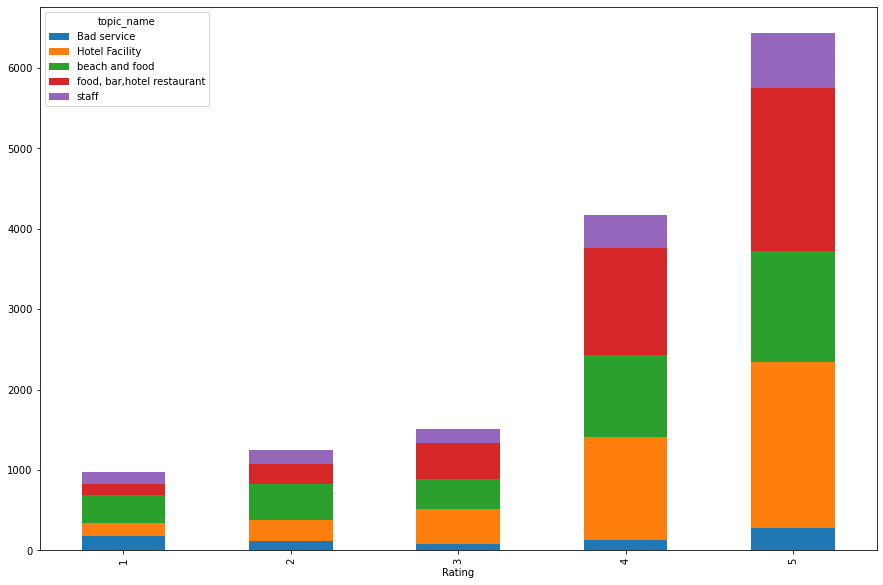

In [86]:
train_data.groupby(['Rating'])['topic_name'].value_counts().unstack('topic_name').plot(kind='bar', stacked=True,figsize=(15,10))